In [ ]:
import io  #io has the tools we need to "i"nput and "o"utput files.
import pandas as pd #pandas has tools to deal with tables of data (normally tables are called "DataFrames" in Python).
import numpy as np #np has mathematical tools we will need every week.
from google.colab import files #files allow us to upload our csv files into google Colab.
import matplotlib.pyplot as plt #our plotting tools
from scipy.optimize import curve_fit #our curve fitting tool  Not really needed for this lab unless you want to get very fancy!
from scipy.stats import linregress

In [ ]:

uploaded = files.upload() #This command gets our data file into google colab's memory
dataframe = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]))# This now moves the data we uploaded into a "dataframe" which we can then manipulate.
dataframe.columns
print(dataframe[0:2])

Saving Lab 9 Red Spring.csv to Lab 9 Red Spring.csv
   Data Set 1:Time(s)  Data Set 1:Position(m)  Data Set 1:Velocity(m/s)  \
0                0.00                0.496572                 -0.160204   
1                0.05                0.491148                 -0.232351   

   Data Set 1:Acceleration(m/s²)  
0                      -1.561163  
1                      -1.631011  


In [ ]:
#These are probably the same as before... but maybe not.
t="Data Set 1:Time(s)" #This should match the first column header in the previous cell's output.  This is the version you get if you do not run the data directly to your computer.
x1="Data Set 1:Position(m)"
v1="Data Set 1:Velocity(m/s)"
a1= "Data Set 1:Acceleration(m/s²)"
m1=0.35

df2=dataframe[[t, x1, v1, a1]].dropna()  #this limits our data to just one run and removes any annoying NaN values that might be hiding at the end of our data.
#So "dataframe" has all the data from the csv file, "df" only holds the data from the single run we are looking at now.

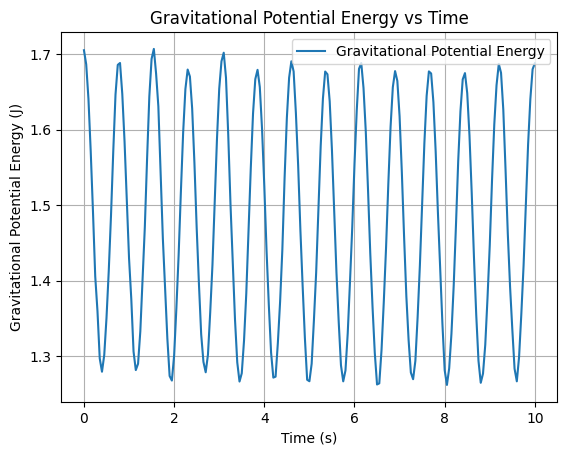

In [ ]:
GPE = m1*9.81*df2[x1]





# Calculate change in gravitational potential energy
# Gravitational potential energy = mass * gravitational acceleration * change in height
# Assuming gravitational acceleration on Earth is approximately 9.8 m/s^2
gravitational_acceleration = 9.8  # m/s^2
df2['Gravitational_Potential_Energy'] = m1 * gravitational_acceleration * df2[x1]

# Display the DataFrame with calculated gravitational potential energy

# Assuming you've already calculated the gravitational potential energy and stored it in the DataFrame df2

# Plot Gravitational Potential Energy against Time
plt.plot(df2[t], GPE, label='Gravitational Potential Energy')
plt.xlabel('Time (s)')
plt.ylabel('Gravitational Potential Energy (J)')
plt.title('Gravitational Potential Energy vs Time')
plt.legend()
plt.grid(True)
plt.show()

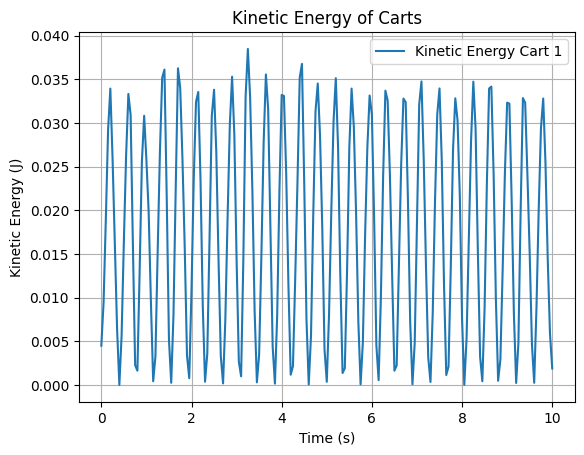

In [ ]:
# Assuming you have data for velocities (v1 and v2) and masses (m1 and m2)
# and time (t) from your previous code

# Calculate kinetic energy for each cart
KE = 0.5 * m1 * (df2[v1])**2

# Plotting kinetic energy for each cart
plt.plot(df2[t], KE, label="Kinetic Energy Cart 1")

# Adding labels and title
plt.legend()
plt.grid()
plt.ylabel("Kinetic Energy (J)")
plt.xlabel("Time (s)")
plt.title("Kinetic Energy of Carts")

# Displaying the plot
plt.show()

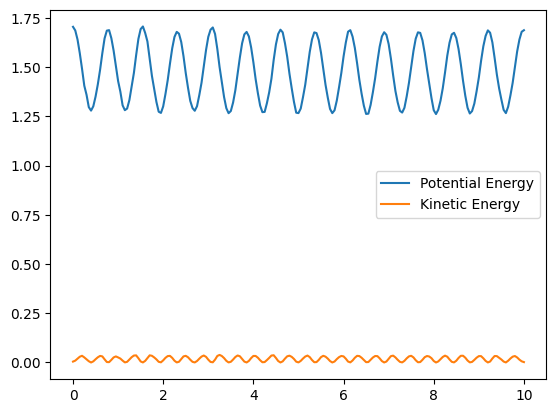

In [ ]:
plt.plot(df2[t], GPE, label="Potential Energy")
plt.plot(df2[t], KE, label="Kinetic Energy")
plt.legend()

Slope of the Linear Fit: -18.771046241416922 N/m


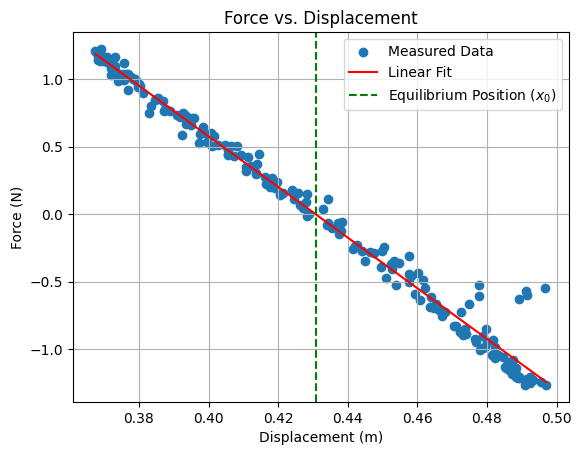

In [ ]:
# Define displacement and force arrays
displacements = df2[x1].values
forces = m1 * df2[a1].values  # Force = mass * acceleration (assuming F = ma)

# Perform linear regression to find the slope and intercept
slope, intercept, r_value, p_value, std_err = linregress(displacements, forces)

# Plot the force vs. displacement data
plt.scatter(displacements, forces, label='Measured Data')
plt.xlabel('Displacement (m)')
plt.ylabel('Force (N)')
plt.title('Force vs. Displacement')
plt.grid(True)

# Plot the linear fit
x_fit = np.linspace(displacements.min(), displacements.max(), 100)
y_fit = slope * x_fit + intercept
plt.plot(x_fit, y_fit, color='red', label='Linear Fit')

# Find equilibrium position (x0)
x0 = -intercept / slope
plt.axvline(x=x0, linestyle='--', color='green', label='Equilibrium Position ($x_0$)')
plt.legend()

# Print the equilibrium position

print("Slope of the Linear Fit:", slope, "N/m")

plt.show()

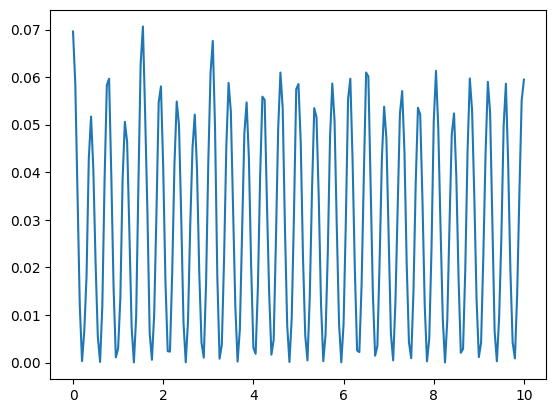

In [ ]:
x0=0.43
k=31.4
SPE = 0.5 * k * (df2[x1] - x0)**2

plt.plot(df2[t], SPE, label="Spring constant")

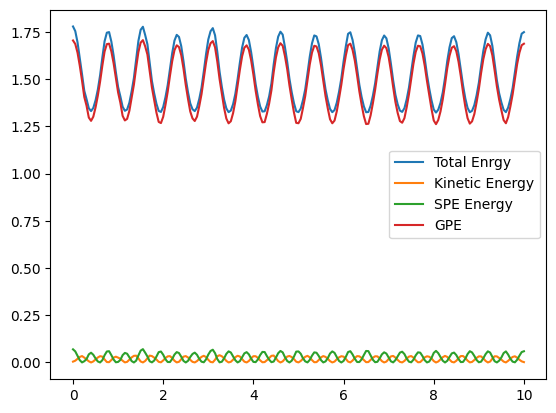

In [ ]:
TE = SPE + KE + GPE
plt.plot(df2[t], TE, label="Total Enrgy")
plt.plot(df2[t], KE, label="Kinetic Energy")
plt.plot(df2[t], SPE, label="SPE Energy")
plt.plot(df2[t], GPE, label="GPE")
plt.legend()